# Linear SVM from Scratch for Spam Detection
We implement a linear Support Vector Machine using the primal form with hinge-loss. The optimisation goal is to minimise `||w||^2` while keeping examples on the correct side of the margin. We use stochastic sub-gradient descent: for each training point, if it lies within the margin we nudge the weight vector toward the correct label; otherwise we only apply weight decay. Although this implementation is simple, it demonstrates how SVMs emphasise the hardest-to-classify samples.

✅ All imports successful!
Original training set shape: (3879, 3000)
Original class distribution: [2759 1120]

✅ Model Evaluation Results:
Accuracy:  0.8616
Precision: 0.8821
Recall:    0.6105
F1 Score:  0.7216


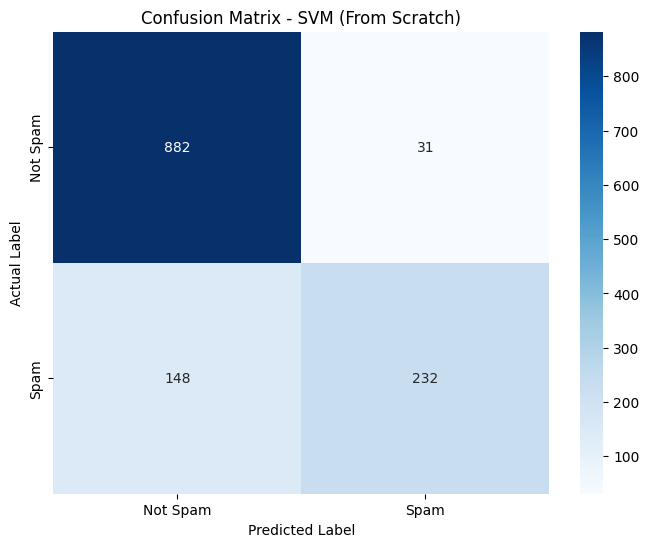

In [2]:
# ===================================================================
# 1. Imports and Setup
# ===================================================================
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE

print("✅ All imports successful!")

# ===================================================================
# 2. Data Loading and Preprocessing
# ===================================================================
# Load the dataset
df = pd.read_csv("./datasets/emails_16_17_18_19.csv")

# Drop the identifier column as it's not a feature
df = df.drop(columns=['Email No.'])

# Separate features (X) and target (y)
X = df.drop(columns=['Prediction']).values
y = df['Prediction'].values

# Convert labels for SVM: Spam=1, Not Spam=-1
y_svm = np.where(y == 0, -1, 1)

# Split data into training and testing sets (75/25 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_svm, test_size=0.25, random_state=42)

print(f"Original training set shape: {X_train.shape}")
print(f"Original class distribution: {np.bincount(np.where(y_train == -1, 0, 1))}")

# ===================================================================
# 3. SVM Implementation from Scratch
# ===================================================================
class SVM_Scratch:
    """
    A simple Support Vector Machine classifier implemented from scratch
    using stochastic sub-gradient descent.
    """
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param  # Regularization strength
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        """
        Train the SVM model using stochastic sub-gradient descent.
        """
        n_samples, n_features = X.shape
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                # Hinge loss condition: y_i * (w·x_i + b) >= 1
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                
                if condition:
                    # If classified correctly and outside the margin, only apply weight decay
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    # If misclassified or within the margin, update weights and bias
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.lr * y[idx]

    def predict(self, X):
        """
        Predict class labels for samples in X.
        """
        # Compute the linear combination and return the sign
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

# ===================================================================
# 4. Model Training and Prediction
# ===================================================================
# Initialize and train the SVM model
svm = SVM_Scratch(learning_rate=0.0001, lambda_param=0.01, n_iters=1000)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# ===================================================================
# 5. Performance Evaluation
# ===================================================================
# Convert labels back from -1/1 to 0/1 for scikit-learn metrics
y_test_conv = np.where(y_test == -1, 0, 1)
y_pred_conv = np.where(y_pred == -1, 0, 1)

# Calculate metrics
cm = confusion_matrix(y_test_conv, y_pred_conv)
acc = accuracy_score(y_test_conv, y_pred_conv)
prec = precision_score(y_test_conv, y_pred_conv, zero_division=0)
rec = recall_score(y_test_conv, y_pred_conv, zero_division=0)
f1 = f1_score(y_test_conv, y_pred_conv, zero_division=0)

print("\n✅ Model Evaluation Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# ===================================================================
# 6. Visualization: Confusion Matrix
# ===================================================================
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - SVM (From Scratch)')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
